In [428]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score,roc_auc_score, roc_curve, RocCurveDisplay
from numpy import mean
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import jaccard_score
import os
os.chdir('C:/Users/ThiagoBluhm/OneDrive - Grupo Portfolio/Documentos/ACOCE/dados')
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings('ignore')

In [2]:
base1 = pd.read_csv('treino_tt.csv') # base geral para treino ate 31 de julho
base2 = pd.read_csv('treste_tt08.csv')
baseteste = pd.read_csv('dados_marco_2022_II.csv') # dados de agosto para teste
frames = [base1, base2]
treino = pd.concat(frames)

In [3]:
baseteste.columns

Index(['Unnamed: 0', 'E3TimeStamp', 'Velocidade', 'CorrenteMotorCalibracao',
       'CorrenteMotorFormacao1', 'CorrenteMotorFormacao2',
       'RPMMotorCalibracao', 'RPMMotorFormacao1', 'RPMMotorFormacao2',
       'VelocidadePadrao', 'PerformanceInstantanea', 'TipoMaterial', 'Altura',
       'Base', 'Diametro', 'Espessura', 'VazaoDiscoCorte',
       'TemperaturaDiscoCorte', 'Status', 'Data'],
      dtype='object')

In [4]:
baseteste.rename( columns={
       'CorrenteMotorCalibracao':'Corrente Motor Calibracao', 'CorrenteMotorFormacao1':'Corrente Motor Formacao 1',
       'CorrenteMotorFormacao2':'Corrente Motor Formacao 2', 'RPMMotorCalibracao':'RPM Motor Calibracao',
       'RPMMotorFormacao1':'RPM Motor Formacao 1', 'RPMMotorFormacao2':'RPM Motor Formacao 2', 'VelocidadePadrao':'VelocidadePadrao',
       'PerformanceInstantanea':'Performance Instantanea', 'TipoMaterial':'Tipo_Material', 'Altura':'Altura', 'Base':'Base',
       'Diametro':'Diametro', 'VazaoDiscoCorte':'Vazao_DiscoCorte', 'TemperaturaDiscoCorte':'Temperatura_DiscoCorte'}, inplace=True)

In [6]:
treino_f = treino.iloc[:, 3:20]
teste_f = baseteste.iloc[:, 3:20]
treino__ = treino_f.loc[:, ['Corrente Motor Calibracao', 'Corrente Motor Formacao 1',
       'Corrente Motor Formacao 2', 'RPM Motor Calibracao',
       'RPM Motor Formacao 1', 'RPM Motor Formacao 2', 'VelocidadePadrao',
       'Performance Instantanea',  'Altura', 'Base',
       'Diametro', 'Espessura', 'Vazao_DiscoCorte', 'Temperatura_DiscoCorte',
       'Status']]
teste__ = teste_f.loc[:, [ 'Corrente Motor Calibracao', 'Corrente Motor Formacao 1',
       'Corrente Motor Formacao 2', 'RPM Motor Calibracao',
       'RPM Motor Formacao 1', 'RPM Motor Formacao 2', 'VelocidadePadrao',
       'Performance Instantanea',  'Altura', 'Base',
       'Diametro', 'Espessura', 'Vazao_DiscoCorte', 'Temperatura_DiscoCorte',
       'Status']]

#betas significantes
treino_bes = treino_f.loc[:, ['Corrente Motor Formacao 1', 'RPM Motor Calibracao','VelocidadePadrao','Performance Instantanea','Tipo_Material',
       'Diametro', 'Status']]
teste_bes = teste_f.loc[:, ['Corrente Motor Formacao 1', 'RPM Motor Calibracao','VelocidadePadrao','Performance Instantanea','Tipo_Material',
       'Diametro', 'Status']]

In [72]:
#tamanho dos datasets
treino_bes.shape, teste_bes.shape

((42450, 7), (5612, 7))

### Split 

In [7]:
X_treino = treino__.drop(columns='Status', axis=1)
y_treino = treino__['Status']
X_teste = teste__.drop(columns='Status', axis=1)
y_teste = teste__['Status']

#np.random.seed(42)
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

#X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, stratify=y)'''

In [8]:
X_treino.shape, y_treino.shape

((42450, 14), (42450,))

### Transforma para NParray 

In [9]:
Xtreino = np.asarray(X_treino)
ytreino = np.asarray(y_treino)
Xteste = np.asarray(X_teste)
yteste = np.asarray(y_teste)

### ClassWeight classification 

In [10]:
weighting = compute_class_weight('balanced', [0,1], ytreino)
weighting

array([0.53566021, 7.51061571])

### GridSearch

In [79]:
LR = LogisticRegression()
RF = RandomForestClassifier()
DT = DecisionTreeClassifier()
SGD = SGDClassifier()
from sklearn.svm import SVC
SVC = SVC()
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier()

np.random.seed(42)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [80]:
pipe = Pipeline(steps=[('estimador', RF)])

In [81]:
params_grid = [
    {
        'estimador': [LR],
        'estimador__C':[0.05,0.5,0.99],
        'estimador__class_weight':['balanced'],
        'estimador__solver':['liblinear','saga'],
        'estimador__penalty':['l1','l2']
    },
    {
        'estimador': [RF],
        'estimador__n_estimators': [1,10,100],
        'estimador__max_depth':[3,6,9],
        'estimador__max_leaf_nodes':[1,2,3,4,5],
        'estimador__criterion':['gini', 'entropy'],
        'estimador__class_weight' : ['balanced']
    },
    {
        'estimador': [DT],
        'estimador__max_depth': [3,6,9],
        'estimador__class_weight' : ['balanced'],
        'estimador__max_leaf_nodes':[1,2,3,4,5],
        'estimador__criterion':['gini', 'entropy']
    }
    
]

In [82]:
grid = GridSearchCV(pipe, params_grid, cv=cv, scoring='roc_auc', verbose=1, n_jobs=-1)
g = grid.fit(Xtreino, ytreino)

Fitting 15 folds for each of 132 candidates, totalling 1980 fits


In [83]:
g.best_estimator_, g.best_score_

(Pipeline(steps=[('estimador',
                  LogisticRegression(C=0.05, class_weight='balanced',
                                     penalty='l1', solver='liblinear'))]),
 0.9999893293638843)

In [84]:
lista_pred = pd.Series(list(g.predict(X_teste)))
lista_pred.value_counts()

0    5358
1     254
dtype: int64

In [85]:
y_teste.value_counts()

0    5360
1     252
Name: Status, dtype: int64

In [76]:
penalty = ['l1']
C = [0.01,0.5,0.99]
class_weight = ['balanced']
solver = ['liblinear']
estimador = LR

param_grid = dict(penalty=penalty, C=C, class_weight=class_weight, solver=solver)

grid = GridSearchCV(estimator=estimador, param_grid=param_grid, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_result = grid.fit(Xtreino, ytreino)

print('Melhor pontuação: ', grid_result.best_score_)
print('Melhores parâmetros: ', grid_result.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Melhor pontuação:  0.9998708249630761
Melhores parâmetros:  {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


### CrossVal 

In [51]:
np.random.seed(42)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

# CROSS VALIDATION
LR = LogisticRegression(solver='liblinear', penalty='l1', C=0.99, class_weight='balanced').fit(Xtreino, ytreino)
resultadoslr = cross_val_score(LR, Xtreino, ytreino, cv=cv, scoring='roc_auc', n_jobs=-1)
print('\n',resultadoslr)
print(LR.score(Xteste, yteste))
#yprob = LR.predict_proba(X_teste)
#print(yprob)

RF = RandomForestClassifier(n_estimators=100, class_weight='balanced').fit(Xtreino, ytreino)
resultadosrf = cross_val_score(RF, Xtreino, ytreino, cv=cv, scoring='roc_auc')
print('\n',resultadosrf)
#print(RF.score(Xteste, yteste))
#yprob2 = RF.predict_proba(X_teste)
#print(yprob2)

DT = DecisionTreeClassifier(max_depth=10, class_weight='balanced').fit(Xtreino, ytreino)
resultadosdt = cross_val_score(DT, Xtreino, ytreino, cv=cv, scoring='roc_auc')
print('\n',resultadosdt)
#yhat = DT.predict(Xteste)
#print(DT.score(Xteste, yteste))
#yprob3 = DT.predict_proba(X_teste)
#print(yprob3)

#SGD = SGDClassifier(random_state=42).fit(X_treino, y_treino)
#resultados = cross_val_score(SGD, Xtreino, ytreino, cv=cv, scoring='accuracy')


#print('Acurácia ROC %.3f' % mean(resultados))'


 [0.99999108 0.99999978 0.99999397 0.99999888 0.99999911 0.99999621
 0.99999352 0.99999844 1.         0.99994126]

 [0.99999978 1.         0.99999955 0.99999531 0.99999978 0.99999855
 0.99999955 0.99999911 1.         0.99999665]

 [0.9999369  0.99911504 0.99911504 0.99911504 0.99987382 0.99899041
 0.99905195 0.99993691 1.         0.99557522]


In [77]:
np.random.seed(42)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

# CROSS VALIDATION
LR = LogisticRegression().fit(Xtreino, ytreino)
resultadoslr = cross_val_score(LR, Xtreino, ytreino, cv=cv, n_jobs=-1, verbose=True)
print('\n',resultadoslr)
#print(LR.score(Xteste, yteste))
#yprob = LR.predict_proba(X_teste)
#print(yprob)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



 [0.9991755  1.         0.99941107 0.99976443 0.99952886 0.99941107
 0.99976443 0.99952886 0.99988221 0.99929329]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.0s finished


In [29]:
from scipy.special import expit

In [304]:
LogisticRegression?

In [572]:
LR = LogisticRegression(solver='liblinear', penalty='l1', C=0.0001, tol=0.001, class_weight='balanced').fit(Xtreino, ytreino)
#RF = RandomForestClassifier(n_estimators=100, class_weight='balanced').fit(Xtreino, ytreino)
#DT = DecisionTreeClassifier(max_depth=10, class_weight='balanced').fit(Xtreino, ytreino)

In [573]:
yhat = LR.predict(Xteste)
jac1 =jaccard_score(yteste, yhat, pos_label=1)
jac0 =jaccard_score(yteste, yhat, pos_label=0)
scr = LR.score(Xtreino, ytreino)

print(f'JACCARD 1 = {jac1}, JACCARD 0 = {jac0} e score = {scr}')

JACCARD 1 = 0.8636363636363636, JACCARD 0 = 0.992730661696179 e score = 0.9837691401648999


In [533]:
#roc_curve?
LR.predict_proba?

In [488]:
yteste

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [598]:
y_pred_proba = LR.predict_proba(Xteste)[:, 1]
fpr, tpr, _ = roc_curve(yteste,  y_pred_proba, pos_label=1)
ctf = 0.5
ys= list(yteste)
ps = list(np.round([1 if y >= ctf else 0 for y in y_pred_proba], 5))
pred = list(np.round(y_pred_proba, 5))
falsos = list(np.round(fpr,3))
verds = list(np.round(tpr, 10))
cuts = list(np.round(_, 10))
data = list(zip(ys, ps,pred, falsos, verds,_))

dff = pd.DataFrame(data, columns=['Real','Previsto','Proba','Falsos Positivos', 'Verdadeiros Positivos', 'Cutoffs'])

In [632]:
x, y = np.unique([1 if y >= ctf else 0 for y in y_pred_proba], return_counts=True)
np.asarray((x,y)).T

y[0]/5612

0.949928724162509

In [621]:
x, y = np.unique(yteste, return_counts=True)
np.asarray((x,y)).T

array([[   0, 5360],
       [   1,  252]], dtype=int64)

In [623]:
#dff[(dff['Real'] == 0) & (dff['Predicao'] >= 0.5)]
dff[(dff['Real'] != dff['Previsto'])]

,Real,Previsto,Proba,Falsos Positivos,Verdadeiros Positivos,Cutoffs
229,1,0,0.05969,0.113,1.0,2.006348e-02
460,1,0,0.27781,0.257,1.0,5.256171e-04
763,0,1,0.95860,0.453,1.0,3.012433e-06
795,0,1,0.59617,0.473,1.0,1.536608e-06
796,0,1,0.59122,0.474,1.0,1.490411e-06
797,0,1,0.59617,0.474,1.0,1.481286e-06
798,0,1,0.59617,0.474,1.0,1.460098e-06
799,0,1,0.59122,0.475,1.0,1.429007e-06
805,0,1,0.59122,0.479,1.0,1.289936e-06
807,0,1,0.51368,0.481,1.0,1.237999e-06


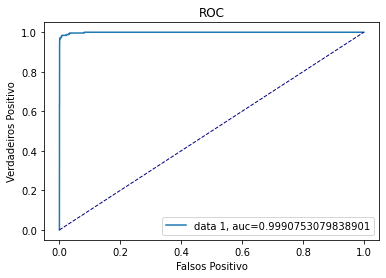

In [578]:
y_pred_proba = LR.predict_proba(Xteste)[::,1]
fpr, tpr, _ = roc_curve(yteste,  y_pred_proba, pos_label=1)
auc = roc_auc_score(yteste, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('Falsos Positivo')
plt.ylabel('Verdadeiros Positivo')
plt.title('ROC')
plt.legend(loc="best")
plt.show()

Matriz de Confusão, sem normalização
[[ 247    5]
 [  34 5326]]


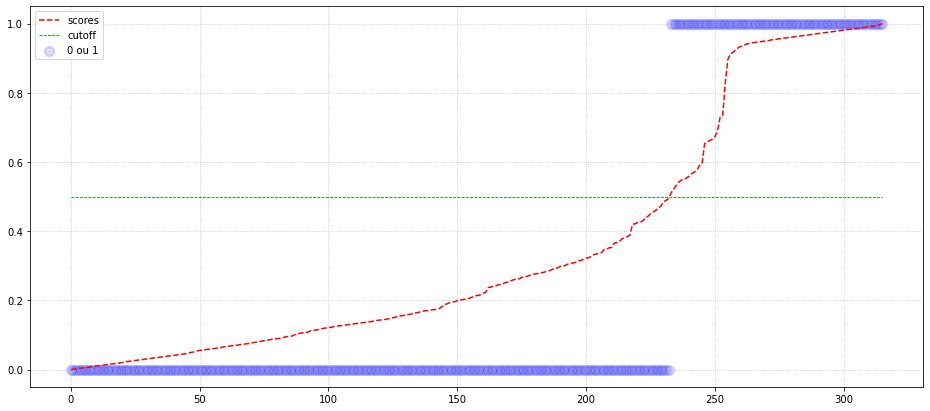

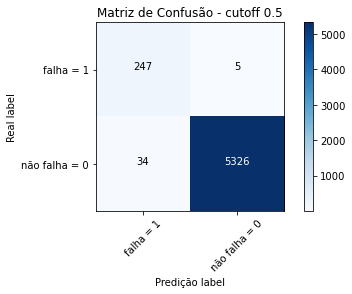

In [567]:
def cutoff_confusion_matrix(estimador, xteste, yteste, cutoff=.5):
    fig, ax = plt.subplots(figsize=(16,7))
    
    y_scores = estimador.predict_proba(xteste)[:, 1]
    ttt = np.unique(np.round(y_scores, 3))
    
    p, r, t = precision_recall_curve(yteste, y_scores)
    y_pred_adj = [1 if y >= cutoff else 0 for y in y_scores]
    y_pred_adj2 = [1 if y >= cutoff else 0 for y in ttt]
    cnf_mtx_cutoff = confusion_matrix(yteste, y_pred_adj, labels=[1,0])
  
    plt.figure(frameon=True, edgecolor='gray')
    dd = pd.DataFrame(y_pred_adj2)
    de = pd.DataFrame([x for x in range(len(ttt))])
    
    ax.scatter(de, dd, linewidths=8, color='blue', marker='.', alpha=0.2, label='0 ou 1')
    ax.plot(ttt, '--', linewidth=1.5, color='red', label='scores')
    ax.plot([cutoff]*len(ttt),'--', color='green', linewidth=0.8, label='cutoff')
    
    ax.grid(alpha=0.8, ds='steps-mid', linestyle=':')
    ax.legend(loc='best')
    
    plot_confusion_matrix(cnf_mtx_cutoff,classes=['falha = 1','não falha = 0'], normalize= False,  title='Matriz de Confusão - cutoff %s' %cutoff)
    #return cnf_mtx_cutoff, cutoff

cutoff_confusion_matrix(LR,Xteste, yteste, cutoff=.5)

Matriz de Confusão, sem normalização
[[ 252    0]
 [   0 5360]]


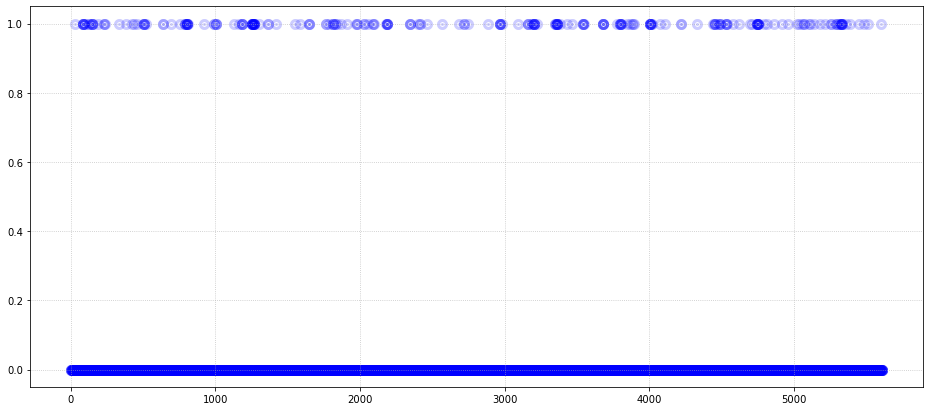

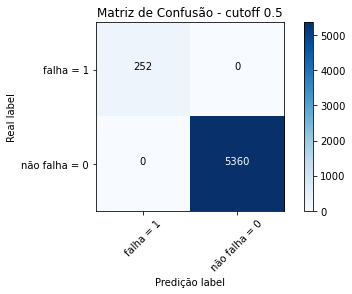

In [101]:
def cutoff_confusion_matrix(estimador, xteste, yteste, cutoff=.5):
    fig, ax = plt.subplots(figsize=(16,7))
    
    y_scores = estimador.predict_proba(xteste)[:, 1]
    p, r, t = precision_recall_curve(yteste, y_scores)
    y_pred_adj = [1 if y >= cutoff else 0 for y in y_scores]
    cnf_mtx_cutoff = confusion_matrix(yteste, y_pred_adj, labels=[1,0])
    
    plt.figure(frameon=True, edgecolor='gray')
    dd = pd.DataFrame(y_scores)
    de = pd.DataFrame([x for x in range(len(yteste))])
    ax.scatter(de, dd, linewidths=8, color='blue', marker='.', alpha=0.2)
    ax.plot(t, '--', linewidth=1.5, color='red')
    ax.grid(alpha=0.8, ds='steps-mid', linestyle=':')
    
    plot_confusion_matrix(cnf_mtx_cutoff,classes=['falha = 1','não falha = 0'], normalize= False,  title='Matriz de Confusão - cutoff %s' %cutoff)
    #return cnf_mtx_cutoff, cutoff

cutoff_confusion_matrix(DT,X_teste, y_teste, cutoff=.5)

In [37]:
import seaborn as sns
import math

Matriz de Confusão, sem normalização
[[ 252    0]
 [   1 5359]]


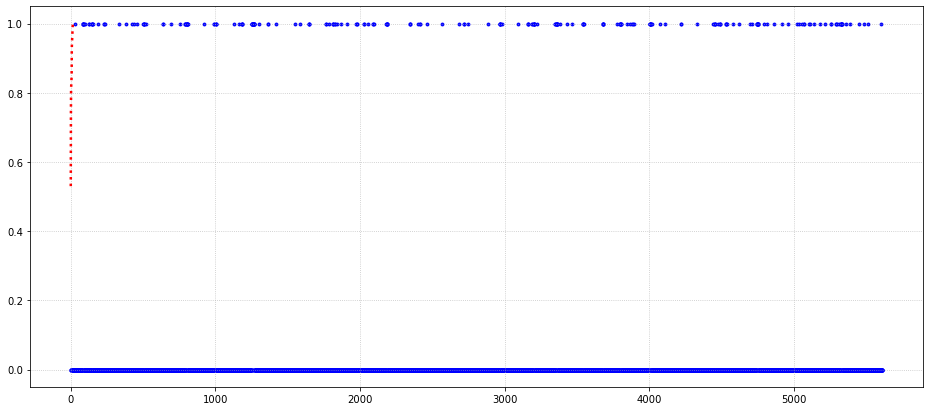

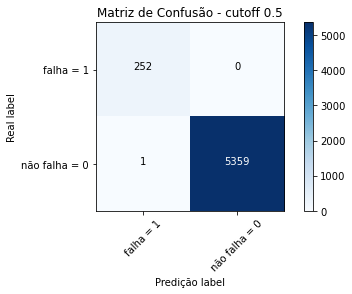

In [102]:
def cutoff_confusion_matrix(estimador, xteste, yteste, cutoff=.5):
    fig, ax = plt.subplots(figsize=(16,7))
    
    y_scores = estimador.predict_proba(xteste)[:, 1]
    p, r, thresholds = precision_recall_curve(yteste, y_scores)
    y_pred_adj = [1 if y >= cutoff else 0 for y in y_scores]
    cnf_mtx_cutoff = confusion_matrix(yteste, y_pred_adj, labels=[1,0])
    
    plt.figure(frameon=True, edgecolor='gray')
    dd = pd.DataFrame(y_pred_adj)
    de = pd.DataFrame([x for x in range(len(yteste))])
    dt = pd.DataFrame(y_pred_adj)
    ax.scatter(de, dd, linewidths=0.85, color='blue', marker='.')
    ax.plot(thresholds, ':', linewidth=2.5, color='red')
    ax.grid(alpha=0.8, ds='steps-mid', linestyle=':')

    
    plot_confusion_matrix(cnf_mtx_cutoff,classes=['falha = 1','não falha = 0'], normalize= False,  title='Matriz de Confusão - cutoff %s' %cutoff)
    #return cnf_mtx_cutoff, cutoff

cutoff_confusion_matrix(RF,X_teste, y_teste, cutoff=.5)

In [303]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalizada Matriz de Confusão")
    else:
        print('Matriz de Confusão, sem normalização')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    
    plt.tight_layout()
    plt.ylabel('Real label')
    plt.xlabel('Predição label')

In [245]:
LogisticRegression?

In [296]:
LR = LogisticRegression(solver='liblinear', 
                        penalty='l1', 
                        C=0.1, tol=0.0000001, 
                        class_weight='balanced', 
                        random_state=0).fit(Xtreino, ytreino)

In [297]:
LR.score(Xtreino, ytreino)

0.9989870435806831

In [298]:
yhat = LR.predict(X_teste)
jaccard_score(y_teste, yhat, pos_label=1)

0.9921259842519685

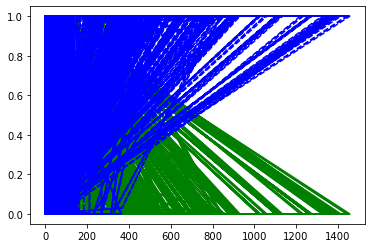

In [302]:
#X_new = np.linspace(0,14,5612).reshape(-1,1)
y_proba = LR.predict_proba(Xteste)
plt.plot(Xteste, y_proba[:,1], "g-", label='Falha')
plt.plot(Xteste, y_proba[:,0], "b--", label='Não falha')

In [174]:
len(np.random.rand(5612,1))

5612

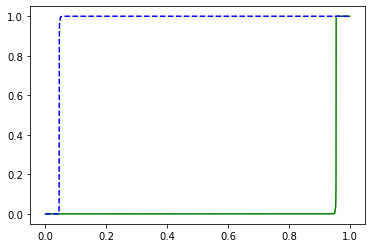

In [179]:
#nums = np.random.rand(5612,1)
nums = np.linspace(0,1, 5612).reshape(-1,1)
plt.plot(nums, np.sort(y_proba[:,1]), "g-", label='Falha')
plt.plot(nums, np.sort(y_proba[:,0]), "b--", label='Falha')


(array([2.530e+02, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 5.355e+03]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

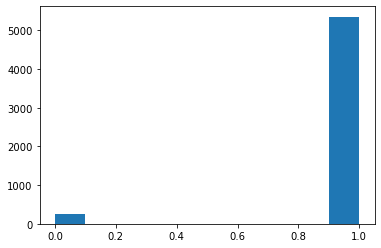

In [182]:
plt.hist(y_proba[:, 0])

In [49]:
np.shape(y_proba)

(5612, 2)

In [111]:
 y_proba[:,1].max()

1.0

In [98]:
r = y_proba[y_proba[:, 0] < 0.98]
print(len(r), len(y_proba[:, 1]))

272 5612


In [109]:
np.linspace(0,1,len(y_proba)).reshape(-1,1)

array([[0.00000000e+00],
       [1.78221351e-04],
       [3.56442702e-04],
       ...,
       [9.99643557e-01],
       [9.99821779e-01],
       [1.00000000e+00]])